<a href="https://colab.research.google.com/github/Jieun1124/ESAA/blob/main/CH5(1)_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 01. 회귀 소개 
---
회귀에서 가장 중요한 것은 회귀계수이다. 이 회귀 계수가 선형이냐 아니냐에 따라 선형 회귀와 비선형 회귀로 나눌 수 있다. 그리고 독립변수의 개수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀로 나뉜다.     

지도학습은 두 가지 유형으로 나뉘는데, 바로 분류와 회귀이다. 이 두 가지 기법의 가장 큰 차이는 분류는 예측값이 카테고리와 같은 이산형 클래스 값이고 회귀는 연속형 숫자 값이라는 것이다.       

여러 가지 회귀 중에서 선형 회귀가 가장 많이 사용된다. 선형 회귀는 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식이다. 선형 회귀 모델은 규제(Regularization) 방법에 따라 다시 별도의 유형으로 나뉠 수 있다. 규제는 일반적인 선형 회귀의 과적합 문제를 해결하기 위해 회귀 계수에 패널티 값을 적용하는 것을 말한다. 대표적인 선형 회귀 모델은 다음과 같다. 
* 일반 선형 회귀: 예측값과 실제 값의 RSS(Residual Sum of Squres)를 최소화할 수 있도록 회귀 계수를 최적화하며 규제(Regularization)을 적용하지 않은 모델이다.
* 릿지(Ridge): 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델이다. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델이다. 
* 라쏘(Lasso): 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식이다. L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것이다. 피처 선택 기능으로도 불린다.
* 엘라스틱넷(ElasticNet): L2, L1 규제를 함께 결합한 모델이다. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정한다.
* 로지스틱 회귀(Logistic Regression): 로지스틱 회귀는 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형 모델이다. 로지스틱 회귀는 매우 강력한 분류 알고리즘이다. 일반적으로 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보인다. 


## 02. 단순 선형 회귀를 통한 회귀 이해
---
실제 값과 회귀 모델의 차이에 따른 오류 값을 잔차라고 부른다. 최적의 회귀 모델을 만든다는 것은 바로 전체 데이터의 잔차(오류값) 합이 최소가 되는 모델을 만든다는 의미이다. 동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미도 된다.     

회귀에서 RSS는 비용(Cost)이며 w 변수(회귀 계수)로 구성되는 RSS를 비용 함수라고 한다. 머신러닝 회귀 알고리즘이 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값(오류 값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것이다. 비용 함수를 손실 함수(loss function)라고도 한다.


## 03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 
---
경사 하강법은 '점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식이다. 경사 하강법은 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해 나간다. 최초 오류 값이 100이었다면 두 번째 오류 값은 100보다 작은 90, 세 번째는 80과 같은 방식으로 지속해서 오류를 감소시키는 방향으로 W 값을 계속 업데이트해 나간다. 그리고 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 W 값을 최적 파라미터로 반환한다.     

경사 하강법의 핵심은 "어떻게 하면 오류가 작아지는 방향으로 W 값을 보정할 수 있을까"이다. 
![image.png](attachment:image.png)

* 경사 하강법 - 파이썬 코드 구현    
100개의 데이터 세트 만들고, 여기에 경사 하강법을 이용해 회귀 계쑤 w1, w0을 도출하기

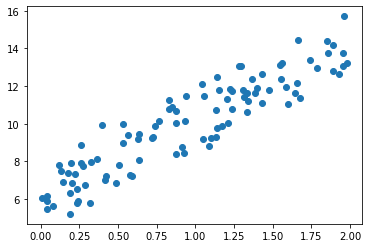

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

데이터는 y = 4X + 6을 중심으로 무작위로 퍼져 있다. 
* 비용 함수 정의해보기 
비용 함수 get_cost()는 실제 y 값과 예측된 y 값을 인자로 받아서 계산한다.

In [ ]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [ ]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [ ]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


실제 선형식인 y = 4X + 6과 유사하게 w1은 4.022, w0은 6.162가 도출되었다. 예측 오류 비용은 약 0.9935이다. 
* 앞에서 구한 y_pred에 기반해 회귀선 그리기

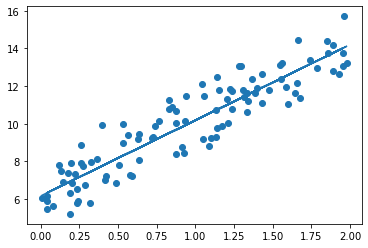

In [ ]:
plt.scatter(X, y)
plt.plot(X,y_pred)

일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있다. 그 때문에 실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent)를 이용한다. 
* 확률적 경사 하강법: 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장한다. 따라서 대용량의 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출한다. 
* (미니 배치) 확률적 경사 하강법 
  * stochastic_gradient_descent_steps(): X, y 데이터에서 랜덤하게 batch_size 만큼 데이터를 추출해 이를 기반으로 w1_update,                                          w0_update를 계산하는 부분이 차이가 있다. 
 

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

* w1, w0 및 예측 오류 비용 계산하기

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


(미니 배치) 확률적 경사 하강법으로 구한 w0, w1 결과는 경사 하강법으로 구한 w1, w0와 큰 차이가 없으며, 예측 오류 비용 또한 0.9937로 경사 하강법으로 구한 예측 오류 비용 0.9935보다 아주 조금 높을 뿐으로 큰 예측 성능상의 차이가 없다. 따라서 큰 데이터를 처리할 경우에는 경사 하강법은 매우 오랜 시간이 걸리므로 일반적으로 확률적 경사 하강법을 이용합니다.  

## 05. 다항 회귀와 과(대)적합/과소적합 이해
---
### 다항 회귀 이해 
* 다항(Polynomial) 회귀: 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것

**다항 회귀는 선형 회귀이다. 회귀에서 선형/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관하다.**     


사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않는다. 대신 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다. 이를 위해 사이킷런은 PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환한다. 
* PolynomialFeatures 클래스: degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환한다. 다른 전처리 변환 클래스와 마찬가지로 fit(), transform() 메서드를 통해 이 같은 변환 작업을 수행한다. 


* PolynomialFeatures 클래스로 다항식 변환


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


* 3차 다항 계수를 이용해 3차 다항 회귀 함수식을 PolynomialFeatures와 LinearRegression 클래스를 이용해 유도하기     
결정값을 구하는 3차 다항 회귀 함수를 임의로 설정하고 이것의 회귀 계수를 예측할 것이다. 먼저 다항 회귀의 결정 함수식은 y = 1+ 2x1 + 3x1^2 + 4x2^3로 설정하고 이를 위한 함수 polynomial_func()를 만든다. 해당 함수는 3차 다항 계수 피처 값이 입력되면 결정 값을 반환한다. 

In [ ]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


일차 단항식 계수를 삼차 다항식 계수로 변환하고, 이를 선형 회귀에 적용하면 다항 회귀로 구현된다. 

In [ ]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


일차 단항식 계수 피처는 2개였지만, 3차 다항식 Polynomial 변환 이후에는 다항식 계수 피처가 10개로 늘어난다. 이 피처 데이터 세트에 LinearRegression을 통해 3차 다항 회귀 형태의 다항 회귀를 적용하면 회귀 계수가 10개로 늘어난다. 10개의 회귀 계수 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]가 도출됐으며 원래 다항식 1+2x1+3x1^2+4x2^3의 계수 값인 [1, 2, 0, 3, 0, 0, 0, 0, 0, 4]와는 차이가 있지만 다항 회귀로 근사하고 있다. **이처럼 사이킷런은 PolynomialFeatures로 피처를 변환한 후에 LinearRegression 클래스로 다항 회귀를 구현한다.**
* 사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습    

사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합해준다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해
다항 회귀를 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있다. 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하다. 하지만 다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어진다. 즉 차수가 높아질수록 과적합의 문제가 크게 발생한다.      


* 다항 회귀를 이용해 과소적합/과적합 문제 보여주는 예제    
원래 데이터 세트는 피처 X와 target y가 잡음(Noise)이 포함된 다항식의 코사인(Cosaine) 그래프 관계를 가지도록 만들어준다. 그리고 이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교하는 예제이다. 학습 데이터는 30개의 임의의 데이터인 X, X의 코사인 값에서 약간의 잡음 변동 값을 더한 target인 y로 구성된다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosaine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

* 예측 결과를 비교할 다항식 차수를 각각 1, 4, 15로 변경하면서 예측 결과 비교하기          
다항식 차수별로 학습을 수행한 뒤 cross_val_score()로 MSE 값을 구해 차수별 예측 성능을 평가한다. 그리고 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선을 그려본다.


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE 는 182815433.54 입니다.


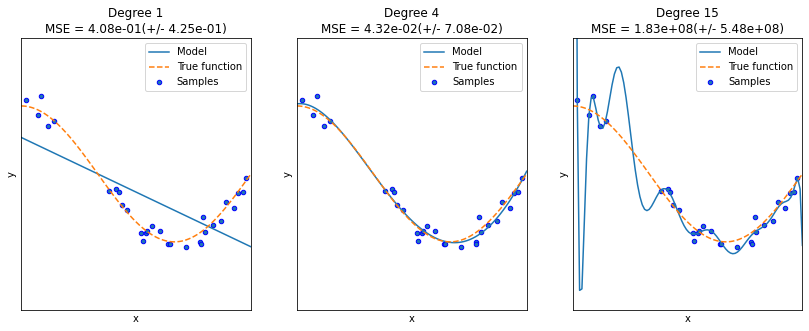

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

실선으로 표현된 예측 곡선은 다항 회귀 예측 곡선이다. 점선으로 표현된 곡선은 실제 데이터 세트 X, Y의 코사인 곡선이다. 학습 데이터는 0부터 1까지의 30개의 임의의 X 값과 그에 따른 코사인 Y 값에 잡음을 변동 값으로 추가해 구성했으며  MSE 평가는 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균한 것이다. 
* Degree 1 예측 곡선: 단순한 직선으로 단순 선형 회귀와 똑같다. 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기는 너무 단순해 보인다. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소적합 모델이 되었다. MSE 값은 약 0.407이다.
* Degree 4 예측 곡선: 실제 데이터 세트와 유사한 모습이다. 비교적 데이터 세트를 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이다. MSE 값은 약 0.043으로 가장 뛰어난 예측 성능을 나타내고 있다. 
* Degree 15: MSE 값이 매우 큰 오류가 발생했다. 데이터 세트의 변동 잡음 값까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어졌다. 결과적으로 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델이 되었고 어이없는 수준의 높은 MSE 값이 나왔다. 

### 편향-분산 트레이드오프(Bias-Variance Trade-off)
편향-분산 트레이드오프는 머신러닝이 극복해야 할 가장 중요한 이슈 중의 하나이다. 앞의 Degree 1과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향이 있는데, 이런 모델을 고편향(High Bias)성을 가졌다고 표현한다. 반대로 Degree 15와 같은 모델은 학습 데이터 하나 하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가지게 되었다. 이런 모델을 고분산(High Variance)성을 가졌다고 표현한다.      

일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있다. 즉, 편향이 높으면 분산은 낮아지고(과소적합) 반대로 분산이 높으면 편향이 낮아진다(과적합).     

편향이 너무 높으면 전체 오류가 높다. 편향을 점점 낮추면 동시에 분산이 높아지고 전체 오류도 낮아진다. 편향을 낮추고 분산을 높이면 전체 오류가 가장 낮아지는 '골디락스' 지점을 통과하면서 분산을 지속적으로 높이면 전체 오류 값이 오히려 증가하면서 예측 성능이 다시 저하된다.
![image.png](attachment:image.png)
높은 편향/낮은 분산에서 과소적합되기 쉬우며 낮은 편향/높은 분산에서 과적합되기 쉽다. 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다.
